In [ ]:
%pip install -r requirements.txt

In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image
import tensorflow as tf
import os
import math
import matplotlib.pyplot as plt
import random
import ultralytics

In [6]:
del baseline_model

In [7]:
baseline_model = YOLO('yolov8n-cls.pt') #download model 

In [8]:
#parameters for baseline_model
params = {
    'data' : '/home/sagemaker-user/output/',
    'optimizer' : 'auto',
    'epochs' : 100,
    "batch" : 16,
    'hsv_h':0.01,
    'hsv_s':0.01,
    'hsv_v':0.01,
    'patience' : 10,
    'dropout' : 0.3,
    'weight_decay': 0.1
}

In [ ]:
#baseline model with params
results = baseline_model.train(**params) #train model

In [10]:
results

ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f7c10075e70>
curves: []
curves_results: []
fitness: 0.9932432472705841
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9864864945411682, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9932432472705841}
save_dir: PosixPath('runs/classify/train8')
speed: {'preprocess': 0.0008731274991422086, 'inference': 9.664271328900313, 'loss': 0.00010632179878853463, 'postprocess': 9.987805340741131e-05}
task: 'classify'
top1: 0.9864864945411682
top5: 1.0

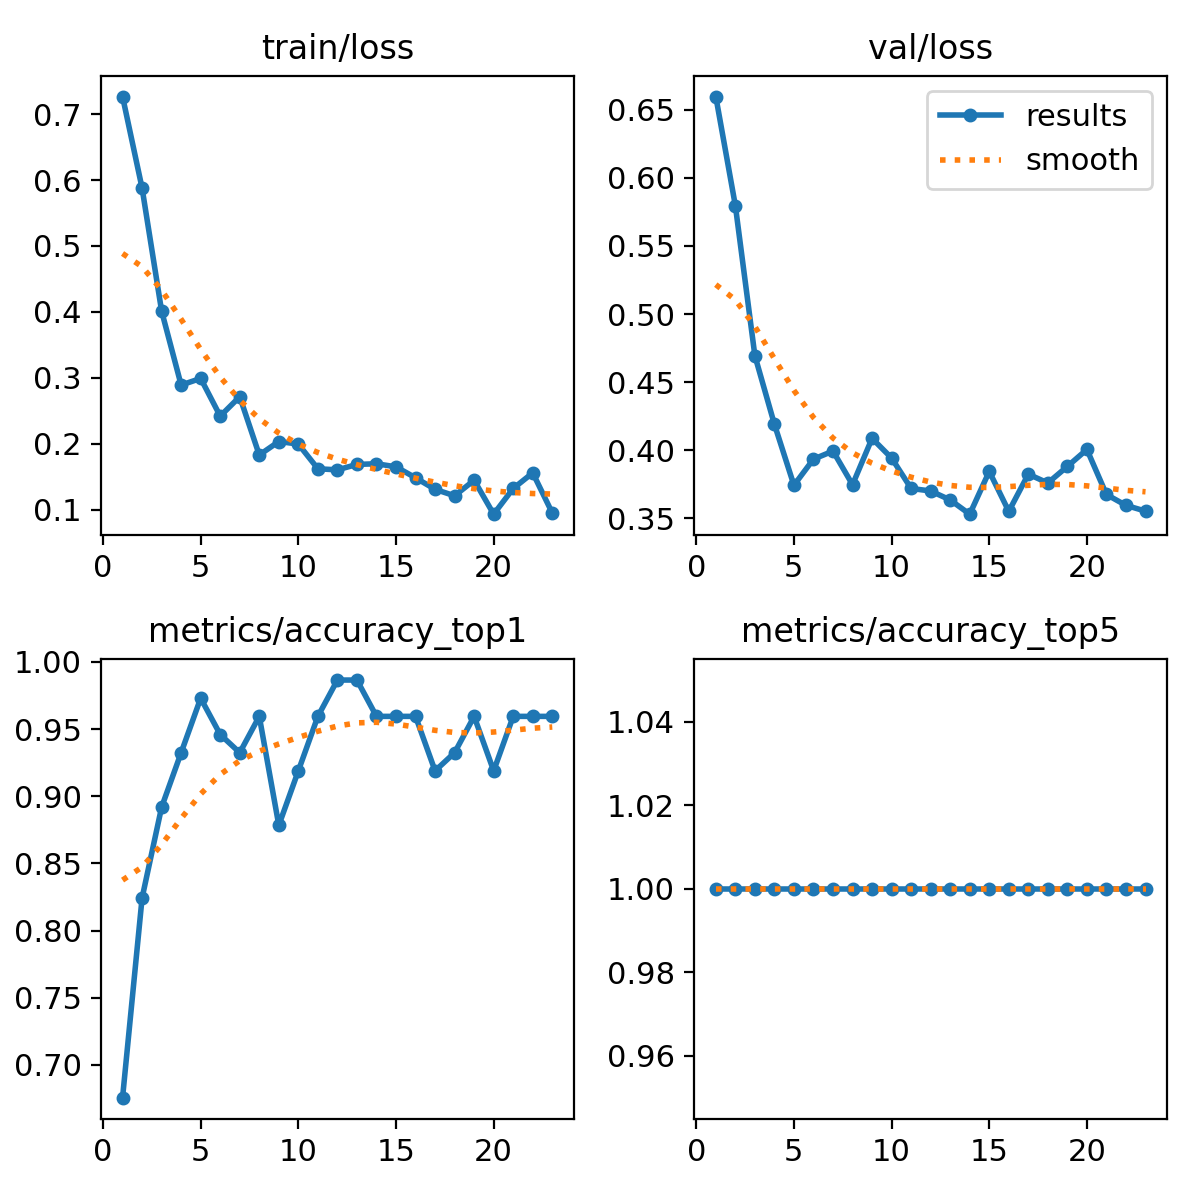

In [4]:
Image(f'runs/classify/train8/results.png', width = 500)

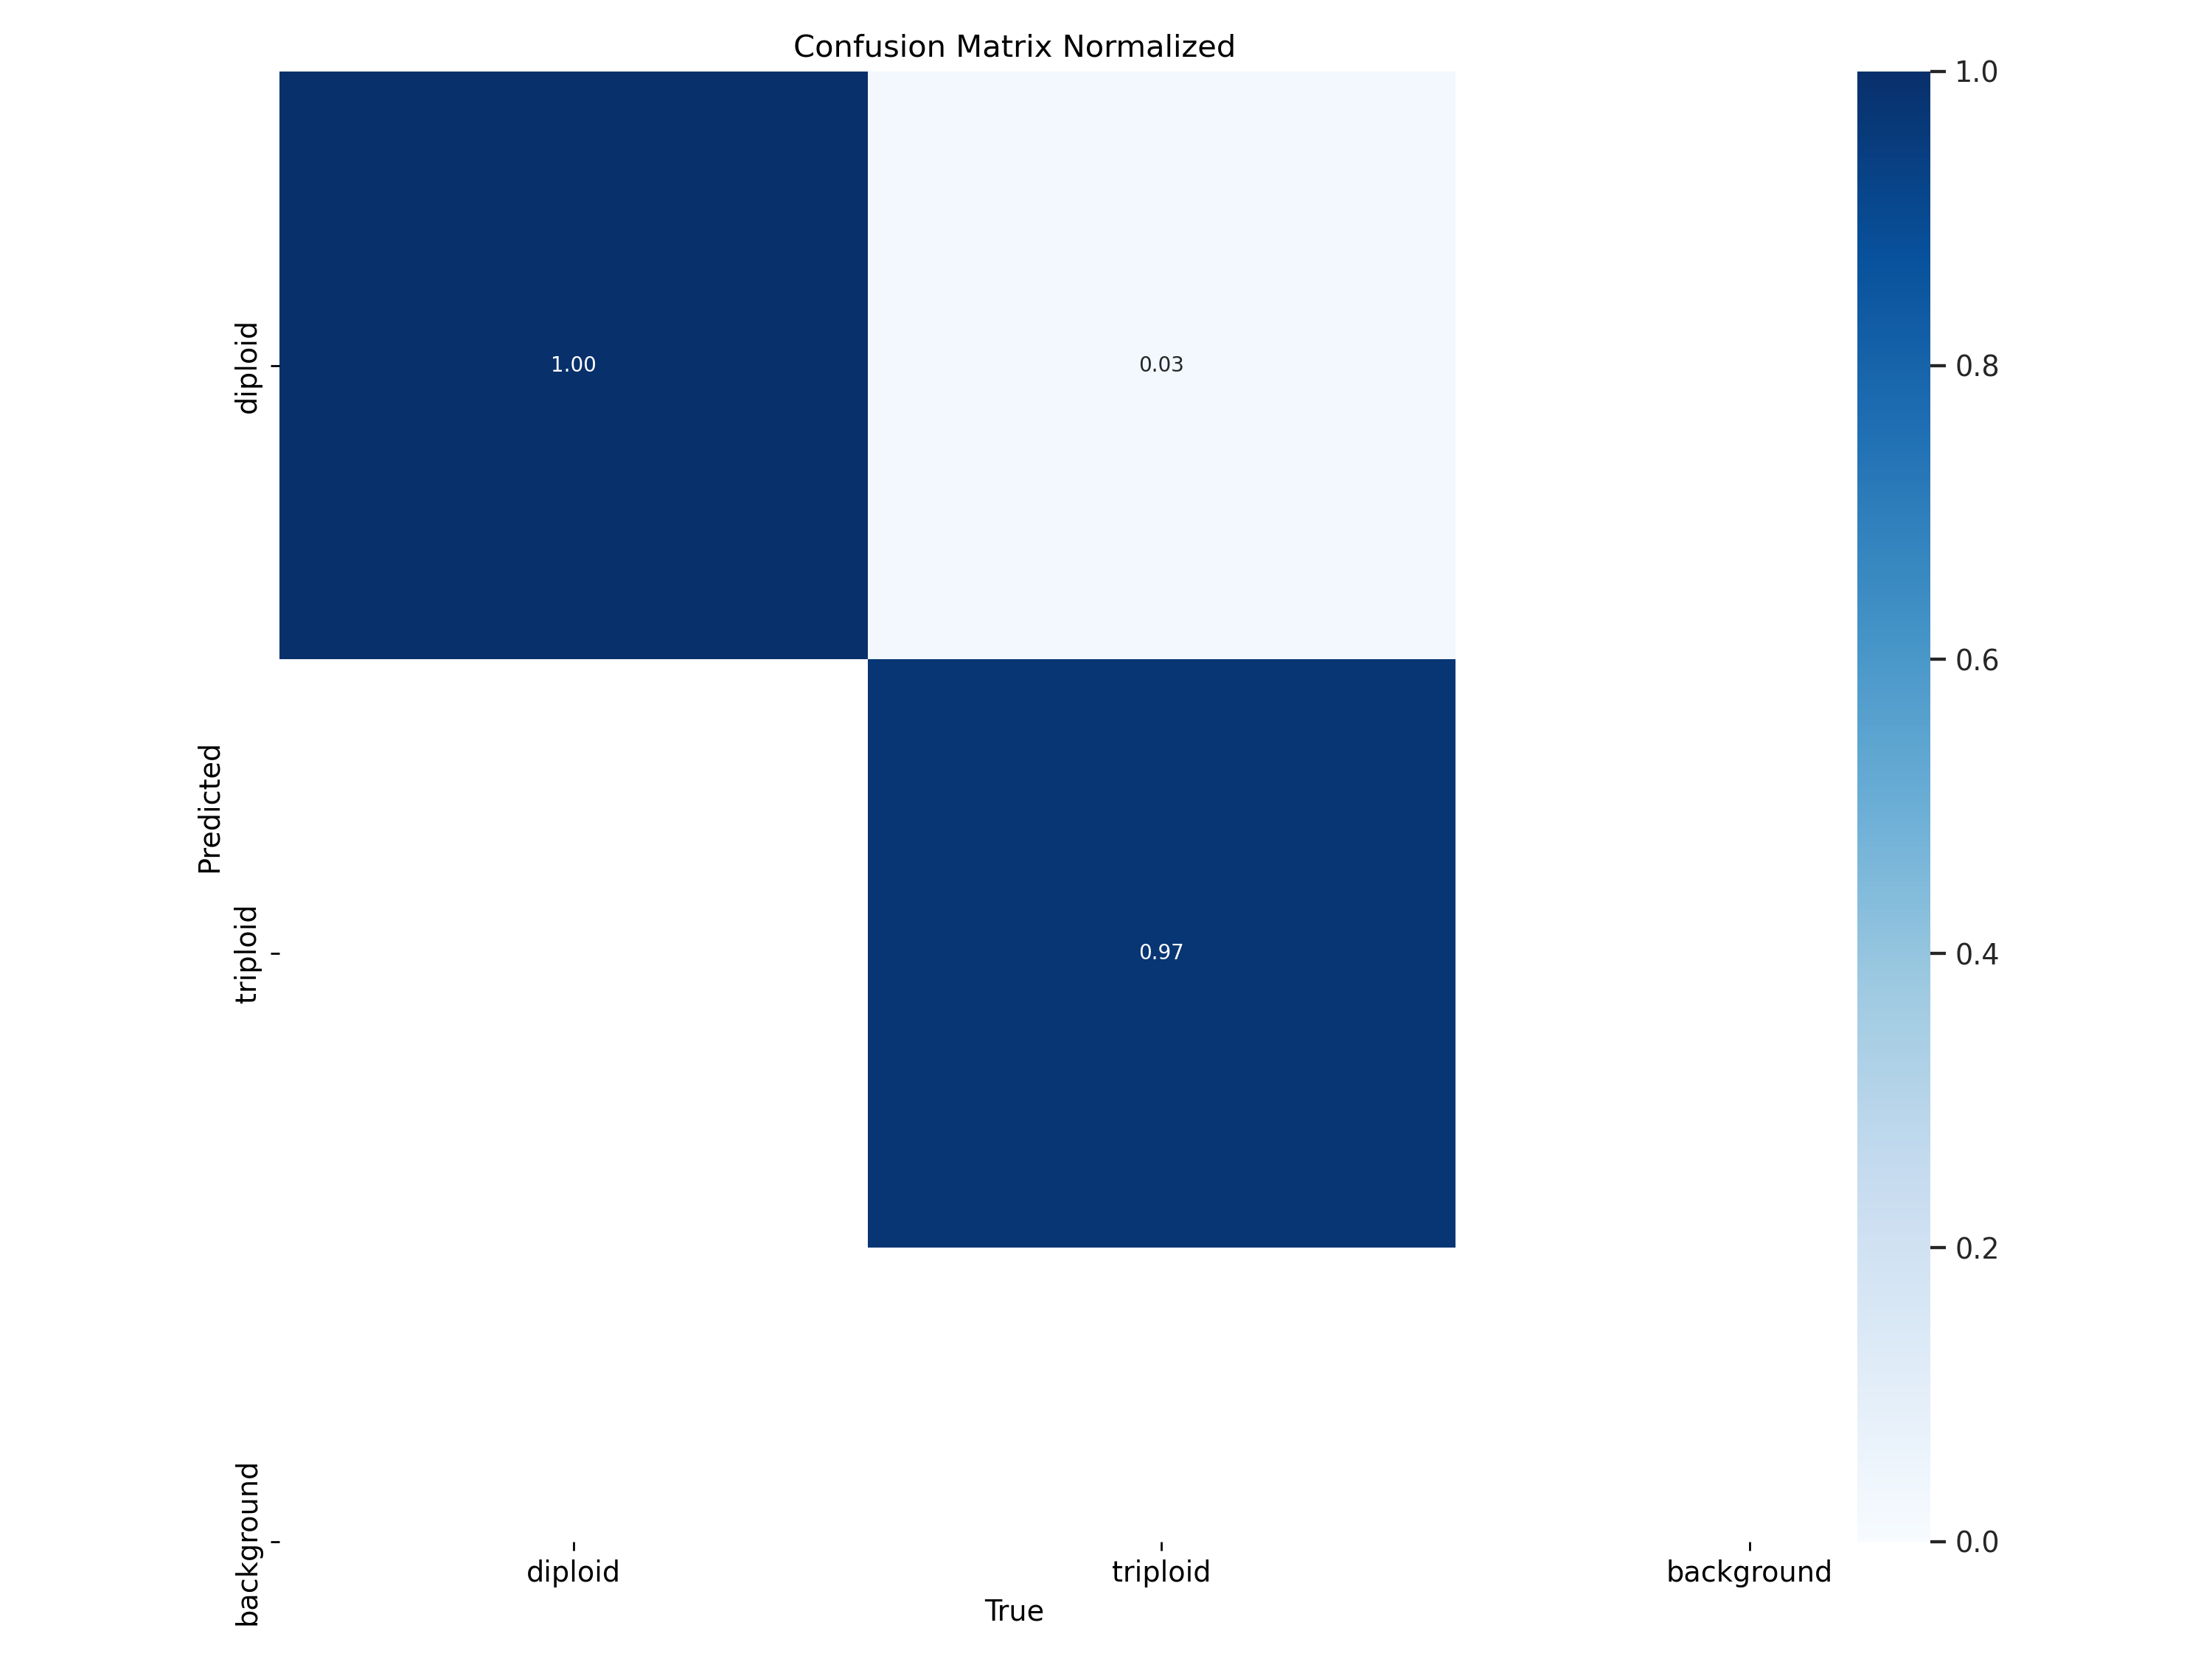

In [5]:
Image(f'runs/classify/train8/confusion_matrix_normalized.png', width = 700)

In [3]:
#saving the new weights of the best model 
final_model = YOLO("runs/classify/train8/weights/best.pt")

**Testing**
-

In [6]:
trip_pred = final_model.predict(conf= 0.5, source='output/test/triploid', save =True)


image 1/40 /home/sagemaker-user/output/test/triploid/3N_GC1_10_S1b_60X.jpg: 224x224 triploid 0.98, diploid 0.02, 109.2ms
image 2/40 /home/sagemaker-user/output/test/triploid/3N_GC1_10_S2a_60X.jpg: 224x224 diploid 0.55, triploid 0.45, 24.4ms
image 3/40 /home/sagemaker-user/output/test/triploid/3N_GC1_1_S1a_40X.jpg: 224x224 triploid 1.00, diploid 0.00, 30.8ms
image 4/40 /home/sagemaker-user/output/test/triploid/3N_GC1_1_S1b_60X.jpg: 224x224 triploid 1.00, diploid 0.00, 31.9ms
image 5/40 /home/sagemaker-user/output/test/triploid/3N_GC1_1_S3b_40X.jpg: 224x224 triploid 1.00, diploid 0.00, 21.6ms
image 6/40 /home/sagemaker-user/output/test/triploid/3N_GC1_1_S3b_60X.jpg: 224x224 triploid 0.98, diploid 0.02, 21.5ms
image 7/40 /home/sagemaker-user/output/test/triploid/3N_GC1_1_S3c_60X.jpg: 224x224 triploid 1.00, diploid 0.00, 19.7ms
image 8/40 /home/sagemaker-user/output/test/triploid/3N_GC1_2_S1a_60X.jpg: 224x224 triploid 1.00, diploid 0.00, 19.6ms
image 9/40 /home/sagemaker-user/output/test/

In [9]:
dip_pred = final_model.predict(conf= 0.5, source='output/test/diploid', save = True)


image 1/36 /home/sagemaker-user/output/test/diploid/2N_GC1_2d_60X_field.jpg: 224x224 diploid 0.99, triploid 0.01, 13.4ms
image 2/36 /home/sagemaker-user/output/test/diploid/2N_GC1_4e_60X_field.jpg: 224x224 diploid 0.71, triploid 0.29, 15.6ms
image 3/36 /home/sagemaker-user/output/test/diploid/2N_GC1_4h_60X_field.jpg: 224x224 diploid 0.99, triploid 0.01, 15.6ms
image 4/36 /home/sagemaker-user/output/test/diploid/2N_GC1_7b_60X_field.jpg: 224x224 diploid 0.95, triploid 0.05, 13.6ms
image 5/36 /home/sagemaker-user/output/test/diploid/2N_GC1_7c_60X_field.jpg: 224x224 diploid 0.98, triploid 0.02, 13.3ms
image 6/36 /home/sagemaker-user/output/test/diploid/2N_GC1_8c_60X_field.jpg: 224x224 diploid 0.98, triploid 0.02, 13.6ms
image 7/36 /home/sagemaker-user/output/test/diploid/2N_GC1_Slide1_image4_40X.jpg: 224x224 diploid 0.98, triploid 0.02, 14.0ms
image 8/36 /home/sagemaker-user/output/test/diploid/2N_GC1_Slide2_image2_60X.jpg: 224x224 triploid 0.59, diploid 0.41, 15.3ms
image 9/36 /home/sage

**More visualization of testing model - Used Kaggle Code (link below)**
-

In [9]:
# Function to get the predictions on test images and to plot random predictions with their labels
#credit from https://www.kaggle.com/code/gauthamupadhyaya/classification-using-yolov8
def test_accuracy_yolo(test_dir,plot_random=False, n_samples = 8):

    test_folders = os.listdir(test_dir)
    i = 0
    v = 0
    result_dict = {}
    true = []

    for folder in test_folders:
        results = final_model(f'{test_dir}/{folder}', verbose=False)
        result_dict.update({folder: results})
        for result in results:
            i += 1
            top1 = result.probs.top1
            classes = result.names
            top1_class_name = classes[top1]
            true.append(folder)
            if top1_class_name == folder:
                v+=1

            true_class = result.path.split('/')[-2]

            probs = result.probs.data
            predicted_class = 1 if probs[0] > probs[1] else 0

            if predicted_class == 1:
                print(f"Prediction for image {i} is for Diploid with: {round(float(probs[0]), 2)} probability with actual class being {true_class}.")
            else:
                print(f"Prediction for image {i} is for Triploid with: {round(float(probs[1]), 2)} probability with actual class being {true_class}.")

    test_accuracy = v/i

    if plot_random == True:
        c = 4
        r = math.ceil(n_samples/c)
        plt.figure(figsize=(20,5*r+1))
        plt.suptitle(f'Visualizing random images with their labels.\nThe accuracy on the data is {str("%.2f" % (test_accuracy*100))}%')
        for i in range(n_samples):

            random_label = random.choice(list(result_dict.keys()))
            random_path = f'{test_dir}/{random_label}'
            pred_vals = result_dict[random_label]
            random_result = random.choice(pred_vals)
            random_top1 = random_result.probs.top1
            classes = random_result.names
            random_top1_class_name = classes[random_top1]
            random_top1cont = random_result.probs.top1conf.tolist()

            plt.subplot(r,c,i+1)
            plt.imshow(random_result.orig_img)
            plt.ylabel(f'Actual : {random_label}')
            plt.xlabel(f'Predicted : {random_top1_class_name}')
            plt.title(f'Confidence : {str("%.2f" % random_top1cont)}')
        
        plt.savefig(f'output_image.png', bbox_inches='tight', pad_inches=0)

    return test_accuracy, result_dict, classes, results, true